In [1]:
# Libraries
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns

## Connect Database

In [2]:
# Note:: The make sure you use the information from your specific PostgreSQL installation
host = r'127.0.0.1' # denotes that the db in a local installation
db = r'MSDS610' # db we just created
user = r'postgres' # using the postgres user for this demo
pw = r'***' # this is the password established during installation
port = r'5432' # default port estabalished during install
schema = r'cleaned' # schema we just created

In [3]:
db_conn = create_engine(f"postgresql://{user}:{pw}@{host}:{port}/{db}")

In [4]:
table_name = r'global_warming_cleaned'

In [5]:
sql="select tables.table_name from information_schema.tables where (table_schema ='"+schema+"')order by 1;"
tbl_df = pd.read_sql(sql, db_conn, index_col=None)
tbl_df

,table_name
0,global_warming_cleaned


## Select Data

In [6]:
sql=r'SELECT * FROM ' + schema + '.' + table_name
gb = pd.read_sql(sql, db_conn, index_col=None)

In [7]:
gb.head(10)

,Country,Year,Temperature_Anomaly,CO2_Emissions,Population,Forest_Area,GDP,Renewable_Energy_Usage,Methane_Emissions,Sea_Level_Rise,...,Waste_Management,Per_Capita_Emissions,Industrial_Activity,Air_Pollution_Index,Biodiversity_Index,Ocean_Acidification,Fossil_Fuel_Usage,Energy_Consumption_Per_Capita,Policy_Score,Average_Temperature
0,Country_1,1900,-0.736197,2.733557e+08,3.186188e+08,15.244316,5.450396e+12,53.313474,5.963399e+06,21.498814,...,82.293541,7.583504,60.305802,119.849255,49.569774,8.006157,55.004982,2474.748082,53.882270,6.971064
1,Country_1,1901,-0.703154,6.998442e+08,1.494792e+09,54.731054,9.044301e+12,46.218131,2.359518e+06,6.527975,...,52.263889,19.029111,33.844962,173.091676,9.140253,8.107997,56.227115,3411.432550,17.905168,32.393594
2,Country_1,1902,-0.269372,6.387650e+08,1.769422e+08,30.736100,3.577474e+12,81.932127,5.874300e+06,37.340943,...,34.289889,5.724153,40.501150,163.346198,65.776186,7.923555,49.416237,1988.796272,53.597921,16.137289
3,Country_1,1903,1.138549,7.073459e+08,8.504665e+08,68.558736,3.423279e+12,30.812757,3.934211e+06,19.431326,...,21.276167,6.383886,60.212029,170.589781,52.224952,7.887093,54.237972,2143.174604,35.826989,23.842348
4,Country_1,1904,0.272228,6.806187e+08,5.487387e+08,30.130873,3.364767e+12,42.098978,2.613544e+06,6.505570,...,47.433426,2.562015,57.873658,110.710126,54.761718,7.730068,26.553637,4023.094770,43.621281,27.347198
5,Country_1,1905,0.779972,6.848920e+08,8.218035e+08,53.451252,5.989337e+12,71.220964,6.835859e+06,14.517514,...,49.894457,11.344739,63.237688,125.723362,73.887508,7.807014,66.237886,2906.285255,50.310318,12.986597
6,Country_1,1906,0.749481,7.384828e+08,9.717844e+08,71.304433,6.368574e+12,40.377358,4.102873e+06,8.631829,...,50.943026,11.720899,80.471674,129.663990,72.375680,7.897264,70.859571,1393.793605,57.001642,3.349868
7,Country_1,1907,-0.637168,6.896140e+08,8.765094e+08,60.596205,7.779992e+12,50.787751,2.742369e+06,31.410363,...,64.933172,12.749148,50.260546,51.202577,25.957086,8.057036,42.843479,3123.596058,46.781841,34.239512
8,Country_1,1908,0.273943,3.965448e+08,9.029806e+08,35.219464,6.451774e+12,39.634114,2.796150e+06,29.593069,...,45.629493,9.452678,31.780187,200.250576,68.295645,7.941333,52.268319,2860.103473,51.230245,14.993037
9,Country_1,1909,0.816333,3.118423e+08,1.311659e+09,27.012174,8.802959e+12,37.756790,1.785549e+06,48.850478,...,76.331272,11.548370,26.583421,48.526769,28.153486,8.138102,43.206151,3803.911623,28.900588,28.454129


## Clean data

 Look for outliers in GDP and Co2 emissions

<Axes: xlabel='GDP'>

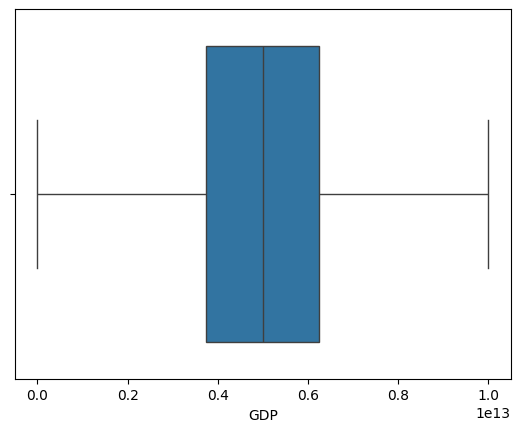

In [11]:
sns.boxplot(data = gb, x= "GDP")

<Axes: xlabel='CO2_Emissions'>

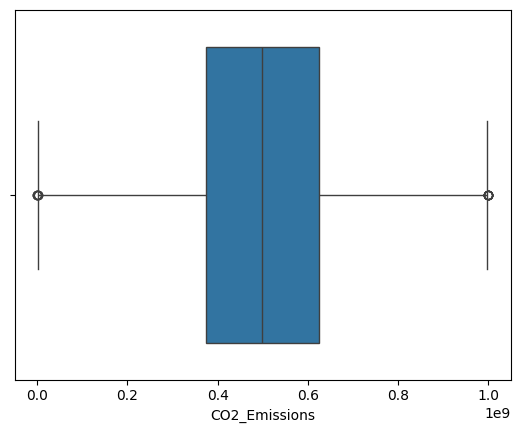

In [12]:
sns.boxplot(data = gb, x= "CO2_Emissions")

In [15]:
gb['CO2_Emissions'].sort_values(ascending= True)

9856     9.126007e+05
21406    1.026579e+06
2693     1.034487e+06
7386     1.247738e+06
17687    1.402890e+06
             ...     
1700     9.983572e+08
8843     9.985410e+08
22248    9.987940e+08
20372    9.988037e+08
11751    9.996629e+08
Name: CO2_Emissions, Length: 23797, dtype: float64

In [16]:
gb['CO2_Emissions'].sort_values(ascending= False)

11751    9.996629e+08
20372    9.988037e+08
22248    9.987940e+08
8843     9.985410e+08
1700     9.983572e+08
             ...     
17687    1.402890e+06
7386     1.247738e+06
2693     1.034487e+06
21406    1.026579e+06
9856     9.126007e+05
Name: CO2_Emissions, Length: 23797, dtype: float64

we can see from our plots that their is no extreme or unreleastic values such as negaitve GDP and unusually high CO₂ emissions we need to check for and clean in our data  

## Analytical Question

#### Classify countries as “high risk,”” medium risk,” or “low risk” for global warming impact based on factors such as ice extent, sea level rise, and GDP


## Feature Selection

The features we will use to determine if a country is “high risk,”” medium risk,” or “low risk” for global warming are: <br> 
* Temperature_Anomaly
* CO2_Emissions
* Forest_Area
* Sea_Level_Rise
* Renewable_Energy_Usage
* Methane_Emissions


These features were handpicked by me, as we are required to select 4–6 features for this lab. They were not pre-tested for feature importance but were selected to the best of my knowledge, based on their potential to address the analytical question.

The reason for picking each feature is as follows:
* **Temperature_Anomaly**: Shows how much the temperature has deviated from previous averages, signifying the impact of global warming
* **CO2_Emissions** : Considered a direct contributor to global warming
* **Forest_Area** : Declining forest area can indicate an increased risk and a rise in CO2 emissions
* **Sea_Level_Rise**: Reflects the direct impact of melting glaciers and warming oceans
* **Renewable_Energy_Usage** : Higher usage of sustainable energy helps mitigate global warming
* **Methane_Emissions** : A type of greenhouse gas that significantly contributes to global warming


In [18]:
gb.columns

Index(['Country', 'Year', 'Temperature_Anomaly', 'CO2_Emissions', 'Population',
       'Forest_Area', 'GDP', 'Renewable_Energy_Usage', 'Methane_Emissions',
       'Sea_Level_Rise', 'Arctic_Ice_Extent', 'Urbanization',
       'Deforestation_Rate', 'Extreme_Weather_Events', 'Average_Rainfall',
       'Solar_Energy_Potential', 'Waste_Management', 'Per_Capita_Emissions',
       'Industrial_Activity', 'Air_Pollution_Index', 'Biodiversity_Index',
       'Ocean_Acidification', 'Fossil_Fuel_Usage',
       'Energy_Consumption_Per_Capita', 'Policy_Score', 'Average_Temperature'],
      dtype='object')

## Random Forest Model

Using unsupervised learning to cluster data points together since they don't have labels of low, medium, or high risk.

In [22]:
#!pip install scikit-learn

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report # text report showing the main classification metrics.
from sklearn.cluster import KMeans

In [25]:

# selected features
features = gb[['Temperature_Anomaly', 'CO2_Emissions', 'Forest_Area', 'Sea_Level_Rise', 
               'Renewable_Energy_Usage', 'Methane_Emissions']]

In [26]:
#  K means custering with 3 clusters ( Low, Medium, High risk)

kmeans = KMeans(n_clusters=3, random_state=42)

gb['Risk_Level'] = kmeans.fit_predict(features)

# 0: 'Low', 1: 'Medium', 2: 'High'

In [27]:
gb

,Country,Year,Temperature_Anomaly,CO2_Emissions,Population,Forest_Area,GDP,Renewable_Energy_Usage,Methane_Emissions,Sea_Level_Rise,...,Per_Capita_Emissions,Industrial_Activity,Air_Pollution_Index,Biodiversity_Index,Ocean_Acidification,Fossil_Fuel_Usage,Energy_Consumption_Per_Capita,Policy_Score,Average_Temperature,Risk_Level
0,Country_1,1900,-0.736197,2.733557e+08,3.186188e+08,15.244316,5.450396e+12,53.313474,5.963399e+06,21.498814,...,7.583504,60.305802,119.849255,49.569774,8.006157,55.004982,2474.748082,53.882270,6.971064,0
1,Country_1,1901,-0.703154,6.998442e+08,1.494792e+09,54.731054,9.044301e+12,46.218131,2.359518e+06,6.527975,...,19.029111,33.844962,173.091676,9.140253,8.107997,56.227115,3411.432550,17.905168,32.393594,2
2,Country_1,1902,-0.269372,6.387650e+08,1.769422e+08,30.736100,3.577474e+12,81.932127,5.874300e+06,37.340943,...,5.724153,40.501150,163.346198,65.776186,7.923555,49.416237,1988.796272,53.597921,16.137289,2
3,Country_1,1903,1.138549,7.073459e+08,8.504665e+08,68.558736,3.423279e+12,30.812757,3.934211e+06,19.431326,...,6.383886,60.212029,170.589781,52.224952,7.887093,54.237972,2143.174604,35.826989,23.842348,2
4,Country_1,1904,0.272228,6.806187e+08,5.487387e+08,30.130873,3.364767e+12,42.098978,2.613544e+06,6.505570,...,2.562015,57.873658,110.710126,54.761718,7.730068,26.553637,4023.094770,43.621281,27.347198,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23792,Country_99,2018,-0.165340,5.782469e+08,9.386856e+08,83.029808,3.628002e+12,61.156610,3.328632e+06,24.999227,...,13.015999,39.628771,89.732081,25.223603,7.768177,32.298767,2529.179744,49.312181,17.412245,1
23793,Country_99,2020,1.109231,2.160874e+08,5.049405e+08,45.809165,9.250810e+12,0.301486,4.548326e+06,3.454109,...,13.781418,15.471605,18.894106,43.439856,8.379784,60.989955,3985.499045,91.637916,18.658815,0
23794,Country_99,2021,-0.545998,4.480615e+08,7.811786e+08,41.287053,5.801529e+12,38.986728,7.616893e+06,29.595769,...,7.781963,44.916805,139.430697,29.210707,7.822459,51.879143,2572.073018,72.931388,7.954975,1
23795,Country_99,2022,0.191586,5.694797e+08,4.056454e+08,63.930209,4.405610e+12,41.703312,1.645025e+06,34.075837,...,12.759963,58.314939,180.411378,29.604080,8.081615,39.210176,2468.395909,48.197488,20.890433,1


In [30]:
# Random Forest

X = gb[['Temperature_Anomaly', 'CO2_Emissions', 'Forest_Area', 'Sea_Level_Rise', 
               'Renewable_Energy_Usage', 'Methane_Emissions']]

y = gb['Risk_Level'] # Dependent


# Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Intitalize Rnd

rnd = RandomForestClassifier(n_estimators=100, random_state=42)


# Model Train

rnd.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# predict

y_pred = rnd.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1806
           1       1.00      1.00      1.00      3582
           2       1.00      1.00      1.00      1752

    accuracy                           1.00      7140
   macro avg       1.00      1.00      1.00      7140
weighted avg       1.00      1.00      1.00      7140



## Analyze Feature importance

In [38]:
# method 1
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp

CO2_Emissions             0.957845
Methane_Emissions         0.010798
Forest_Area               0.008979
Sea_Level_Rise            0.008650
Renewable_Energy_Usage    0.007657
Temperature_Anomaly       0.006070
dtype: float64

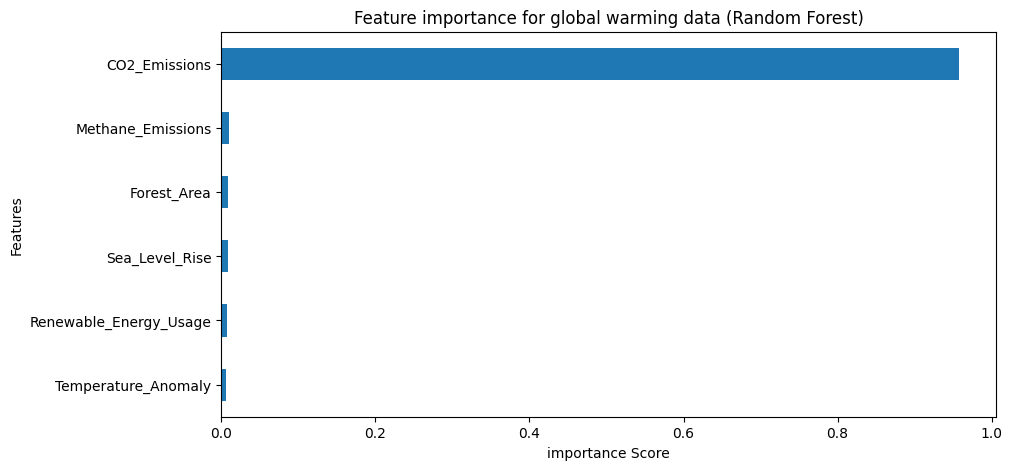

In [40]:
# plot

plt.figure(figsize=(10,5))
feat_imp.sort_values().plot(kind="barh")
plt.xlabel("importance Score")
plt.ylabel("Features")
plt.title("Feature importance for global warming data (Random Forest)")
plt.show()

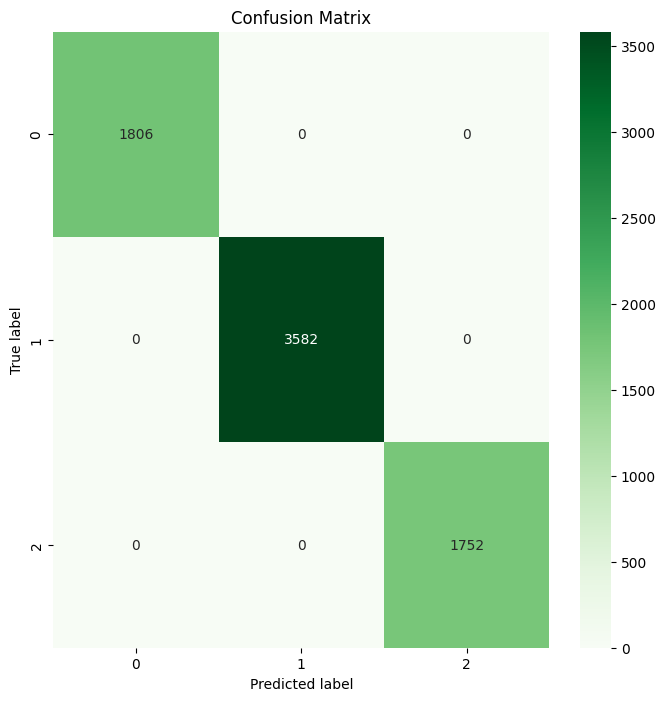

In [51]:
# method 2 source: https://www.datacamp.com/tutorial/what-is-a-confusion-matrix-in-machine-learning
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
# Create a Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Summary

For this lab, I focused on implementing 6 features to support my analysis question of classifying countries as "high risk," "medium risk," or "low risk" for global warming impact, based on factors such as ice extent, sea level rise, and GDP. I started by cleaning up my data. Previously, I had removed duplicate rows and handled missing values. In this notebook, I focused on identifying outliers in my GDP and CO2 emissions values.

For my features, I randomly selected the following 6:

* Temperature_Anomaly
* CO2_Emissions
* Forest_Area
* Sea_Level_Rise
* Renewable_Energy_Usage
* Methane_Emissions

These features were handpicked by me, as we were required to select 4-6 features for this lab. They were not pre-tested for feature importance but were selected to the best of my knowledge based on their potential to address the analytical question.

After selecting my features, I attempted to create a Random Forest model. However, I couldn't proceed with that since I didn’t have a column called "Risk_Level." Therefore, I needed to perform unsupervised learning to create 3 clusters representing the 3 risk levels.

Once I had a "Risk_Level" column, I proceeded to create my Random Forest classification model, where the dependent variable was "Risk_Level" and the independent variables were my selected features.

After running the model and analyzing the accuracy, I observed that the model achieved 100% accuracy in predictions. With our feature importance graph, we can see that, out of the 6 features, CO2 emissions played a key role in prediction within our Random Forest model. Our confusion matrix shows 100% accuracy and correct classification of our 3 categories, comparing predicted labels with true labels.

Looking ahead, I think one improvement for this lab would be to use all columns in my dataset for the KMeans feature, and then only use 6 features for the Random Forest model. I believe this would provide a different outcome. In the future, instead of randomly selecting features, I would use machine learning techniques to help identify the best features for my models.